In [28]:
import itc_utils.flight_service as itcfs

readClient = itcfs.get_flight_client()

nb_data_request = {
    'data_name': """german_credit_data_2.csv""",
    'interaction_properties': {
        #'row_limit': 500,
        'infer_schema': 'true',
        'infer_as_varchar': 'false'
    }
}

flightInfo = itcfs.get_flight_info(readClient, nb_data_request=nb_data_request)

data_df_1 = itcfs.read_pandas_and_concat(readClient, flightInfo)
data_df_1.head(10)

,COLUMN1,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NA,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NA,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NA,NA,9055,36,education,good
6,6,53,male,2,own,quite rich,NA,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,NA,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


In [29]:
df_credit = data_df_1

In [30]:
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

In [31]:
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   COLUMN1           1000 non-null   int32 
 1   Age               1000 non-null   int32 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int32 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int32 
 8   Duration          1000 non-null   int32 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int32(5), object(6)
memory usage: 66.5+ KB
None


In [32]:
#Looking unique values
print(df_credit.nunique())
#Looking the data
print(df_credit.head())

COLUMN1             1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        5
Checking account       4
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64
   COLUMN1  Age     Sex  Job Housing Saving accounts Checking account  \
0        0   67    male    2     own              NA           little   
1        1   22  female    2     own          little         moderate   
2        2   49    male    1     own          little               NA   
3        3   45    male    2    free          little           little   
4        4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  

In [33]:
#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats)


df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

In [34]:
print("Sex : ",df_credit.Sex.unique())
print("Housing : ",df_credit.Housing.unique())
print("Saving accounts : ",df_credit['Saving accounts'].unique())
print("Risk : ",df_credit['Risk'].unique())
print("Checking account : ",df_credit['Checking account'].unique())
print("Aget_cat : ",df_credit['Age_cat'].unique())

Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  ['NA' 'little' 'quite rich' 'rich' 'moderate']
Risk :  ['good' 'bad']
Checking account :  ['little' 'moderate' 'NA' 'rich']
Aget_cat :  ['Senior', 'Student', 'Adult', 'Young']
Categories (4, object): ['Student' < 'Young' < 'Adult' < 'Senior']


In [35]:
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [36]:
df_credit['Saving accounts'] = df_credit['Saving accounts'].fillna('no_inf')
df_credit['Checking account'] = df_credit['Checking account'].fillna('no_inf')

#Purpose to Dummies Variable
df_credit = df_credit.merge(pd.get_dummies(df_credit.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
df_credit = df_credit.merge(pd.get_dummies(df_credit["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
df_credit = df_credit.merge(pd.get_dummies(df_credit.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
df_credit = df_credit.merge(pd.get_dummies(df_credit["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
# Housing get Age categorical
df_credit = df_credit.merge(pd.get_dummies(df_credit["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

In [37]:
#Excluding the missing columns
del df_credit["Saving accounts"]
del df_credit["Checking account"]
del df_credit["Purpose"]
del df_credit["Sex"]
del df_credit["Housing"]
del df_credit["Age_cat"]
del df_credit["Risk"]
del df_credit['Risk_good']

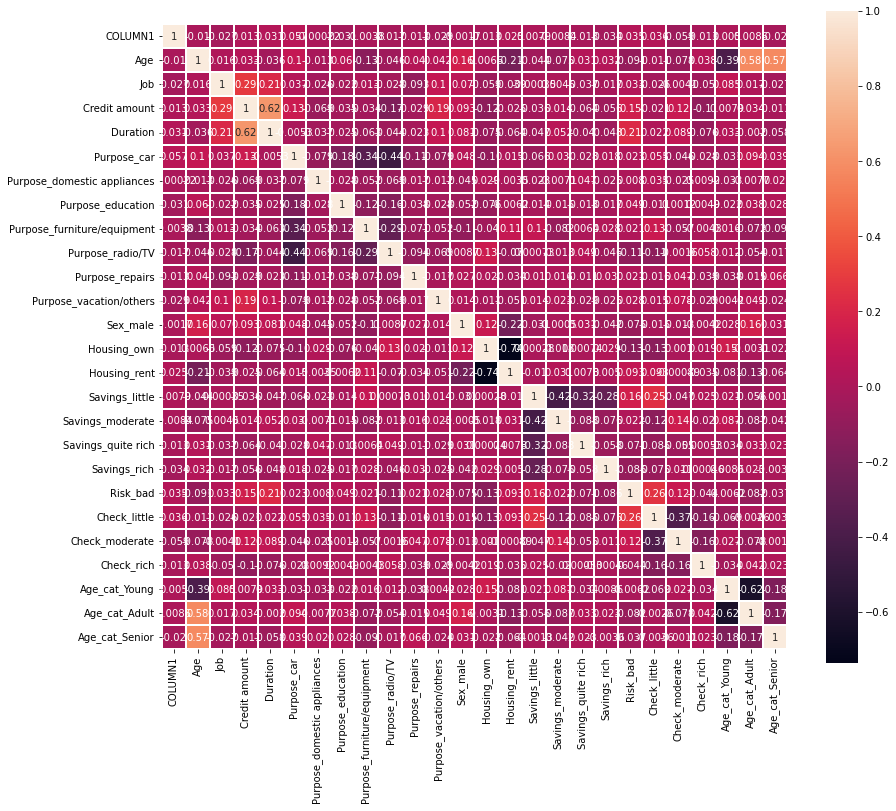

In [38]:
plt.figure(figsize=(14,12))
sns.heatmap(df_credit.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [39]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [40]:
df_credit['Credit amount'] = np.log(df_credit['Credit amount'])

In [41]:
#Creating the X and y variables
X = df_credit.drop('Risk_bad', 1).values
y = df_credit["Risk_bad"].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

/tmp/1000630000/ipykernel_127/3954407195.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df_credit.drop('Risk_bad', 1).values


In [46]:
# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  coefs.append(w0.copy())
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regress

LR: 0.381618 (0.086325)
LDA: 0.418790 (0.082453)
KNN: 0.240532 (0.098844)
CART: 0.445891 (0.106384)
NB: 0.621068 (0.089905)
RF: 0.320990 (0.091063)
SVM: 0.008711 (0.017889)


In [47]:
#Seting the Hyper Parameters
param_grid = {"max_depth": [3,5, 7, 10,None],
              "n_estimators":[3,5,10,25,50,150],
              "max_features": [4,7,15,20]}

#Creating the classifier
model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.267 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.222 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.109 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.043 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.087 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.089 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.089 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.130 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.087 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.022 total time=   0.0s
[CV 1/5] END max_depth=3, max_feature

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'max_features': [4, 7, 15, 20],
                         'n_estimators': [3, 5, 10, 25, 50, 150]},
             scoring='recall', verbose=4)

In [48]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.45130434782608697
{'max_depth': None, 'max_features': 15, 'n_estimators': 3}


In [49]:
rf = RandomForestClassifier(max_depth=None, max_features=10, n_estimators=15, random_state=2)

#trainning with the best params
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=10, n_estimators=15, random_state=2)

In [50]:
# Criando o classificador logreg
GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_train, y_train)

In [51]:
# Printing the Training Score
print("Training score data: ")
print(model.score(X_train, y_train))

Training score data: 
0.6933333333333334


In [52]:
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

0.612


[[120  58]
 [ 39  33]]


              precision    recall  f1-score   support

           0       0.75      0.67      0.71       178
           1       0.36      0.46      0.40        72

    accuracy                           0.61       250
   macro avg       0.56      0.57      0.56       250
weighted avg       0.64      0.61      0.62       250



In [53]:
import os

wml_credentials = {
    "instance_id": "openshift",
    "token": os.environ.get("USER_ACCESS_TOKEN"),
    "url": os.environ.get("RUNTIME_ENV_APSX_URL"),
    "version": "4.5"
}


In [54]:
wml_credentials['url']

from ibm_watson_machine_learning import APIClient
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----------------------  ------------------------
ID                                    NAME                     CREATED
2467d5da-280f-4544-a250-f39533c63614  Akbank Deployment Space  2022-08-24T10:13:31.167Z
------------------------------------  -----------------------  ------------------------


In [55]:
space_id = '2467d5da-280f-4544-a250-f39533c63614'
wml_client.set.default_space(space_id)

wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
runtime-22.1-r3.6              018ebea5-1d1f-5fec-b93e-5e2ab30e7f38  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
runtime-22.1-py3.9             12b83a17-24d8-5082-900f-0ab31fbfd3cb  base
scikit-learn_0.22-py3.6        154010f

In [56]:
sofware_spec_uid = wml_client.software_specifications.get_id_by_name("runtime-22.1-py3.9")

In [57]:
metadata = {
            wml_client.repository.ModelMetaNames.NAME: 'Model',
            wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0',
            wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sofware_spec_uid
}

In [58]:
published_model = wml_client.repository.store_model(model= model, meta_props=metadata)
model_uid = wml_client.repository.get_model_id(published_model)
models_details = wml_client.repository.list_models()

------------------------------------  -----------------------------------  ------------------------  ----------------
ID                                    NAME                                 CREATED                   TYPE
ad89fd10-4a42-4c3a-9857-bac1a52c967c  Model                                2022-08-24T11:01:50.002Z  scikit-learn_1.0
ce254fb1-3470-483c-b840-a9393f3d47c0  Auto AI - P3 Extra Trees Classifier  2022-08-24T10:13:57.002Z  wml-hybrid_0.1
------------------------------------  -----------------------------------  ------------------------  ----------------


In [59]:
metadata = {
wml_client.deployments.ConfigurationMetaNames.NAME: "Deployment of Python model",
wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [60]:
deployment = wml_client.deployments.create(model_uid, meta_props=metadata)
deployment_uid = wml_client.deployments.get_uid(deployment)



#######################################################################################

Synchronous deployment creation for uid: 'ad89fd10-4a42-4c3a-9857-bac1a52c967c' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.
.................................................
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='2f3dc1cd-2123-49b5-affc-33c929d12ba9'
------------------------------------------------------------------------------------------------




In [61]:
print("Model id: {}".format(model_uid))
print("Deployment id: {}".format(deployment_uid))

Model id: ad89fd10-4a42-4c3a-9857-bac1a52c967c
Deployment id: 2f3dc1cd-2123-49b5-affc-33c929d12ba9
